# Challenge 5

### Loading the data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'kanch_sat'

trainfileToRead = '5challenge_training_' + student_identity + '.csv'
testfileToRead = '5challenge_testing_' + student_identity + '.csv'

training_df = pd.read_csv('C:/Users/asus/Documents/TAMU/Fall-18/ECEN-689/Challenge5/' + trainfileToRead)
testing_df = pd.read_csv('C:/Users/asus/Documents/TAMU/Fall-18/ECEN-689/Challenge5/' + testfileToRead, index_col = 0)

print(training_df.head())

X = training_df[['Feature 0', 'Feature 1']]
Y = training_df['Class']

x_test = testing_df[['Feature 0', 'Feature 1']]

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      0   0.049575  -0.007515
1           1      1  -0.287457  -0.378961
2           2      1  -1.436982   0.196501
3           3      0  -1.532747  -1.651113
4           4      1  -0.052144  -0.111227


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix 

In [40]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

In [41]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

### Linear kernel

In [42]:
##Linear kernel
clf1 = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_val)
print(confusion_matrix(y_val,y_pred1))  
print(classification_report(y_val,y_pred1))

[[ 8 10]
 [ 3 19]]
             precision    recall  f1-score   support

          0       0.73      0.44      0.55        18
          1       0.66      0.86      0.75        22

avg / total       0.69      0.68      0.66        40



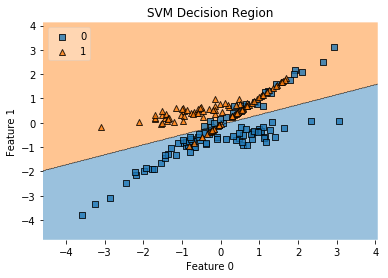

In [43]:
plot_decision_regions(X.values, Y.values, clf=clf1, legend=2)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.title('SVM Decision Region')
plt.show()

#### Misclassification = 13

### Polynomial kernel

[[ 6 12]
 [ 0 22]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50        18
          1       0.65      1.00      0.79        22

avg / total       0.81      0.70      0.66        40



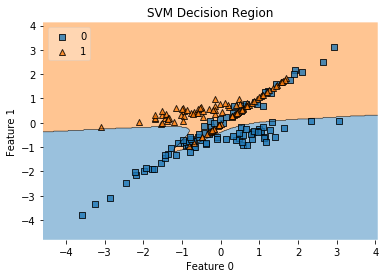

In [44]:
clf2 = GridSearchCV(SVC(kernel='poly', degree = 3), param_grid, cv=5)
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_val)
print(confusion_matrix(y_val,y_pred2))  
print(classification_report(y_val,y_pred2))

plot_decision_regions(X.values, Y.values, clf=clf2, legend=2)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.title('SVM Decision Region')
plt.show()

#### Misclassification = 12

### Gaussian kernel

[[11  7]
 [ 1 21]]
             precision    recall  f1-score   support

          0       0.92      0.61      0.73        18
          1       0.75      0.95      0.84        22

avg / total       0.82      0.80      0.79        40



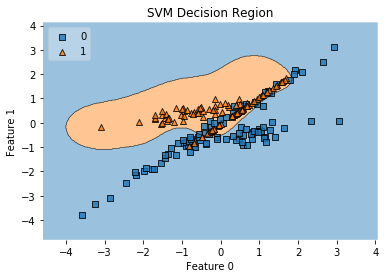

In [45]:
clf3 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_val)
print(confusion_matrix(y_val,y_pred3))  
print(classification_report(y_val,y_pred3))

plot_decision_regions(X.values, Y.values, clf=clf3, legend=2)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.title('SVM Decision Region')
plt.show()

#### Misclassification = 8

### Sigmoid kernel

[[ 7 11]
 [ 3 19]]
             precision    recall  f1-score   support

          0       0.70      0.39      0.50        18
          1       0.63      0.86      0.73        22

avg / total       0.66      0.65      0.63        40



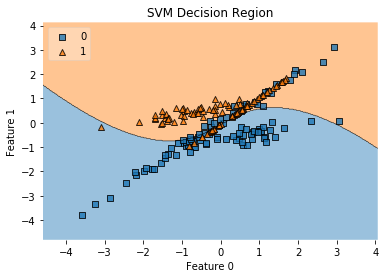

In [47]:
clf4 = GridSearchCV(SVC(kernel='sigmoid'), param_grid, cv=5)
clf4.fit(x_train, y_train)
y_pred4 = clf4.predict(x_val)
print(confusion_matrix(y_val,y_pred4))  
print(classification_report(y_val,y_pred4))

plot_decision_regions(X.values, Y.values, clf=clf4, legend=2)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.title('SVM Decision Region')
plt.show()

#### Misclassification = 14

#### The Gaussian kernel gave minimum misclassification on the validation dataset amongst all the kernels, therefore we will use the Gaussian kernel for prediction on our test data.

### Prediction on Test Data

In [56]:
y_pred = clf3.predict(x_test)

In [57]:
y_pred_df = pd.DataFrame(y_pred)

In [58]:
testing_df['Class'] = y_pred_df

In [63]:
testing_df.to_csv("C:/Users/asus/Documents/TAMU/Fall-18/ECEN-689/Challenge5/prediction.csv", index = False)